In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf(print_tf=True)
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
path_plot = PATHPLOT / Path('PhD')
path_ene_plot_1 = path_plot / Path('ene_plot_1')
path_suppinf = PATHPLOT / Path(PATHNPAPR, 'suppinf')
path_extras = path_suppinf / Path('extras')
path_tsb = path_extras / Path('tsb')
path_eris = path_plot / Path('ising_ER_panel_4')
path_l2dcorrect = path_plot / Path('l2d_squared_cluster')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


In [3]:
side = 64
neigen = 2
cell = 'randXERR'
tt = 'long'

In [4]:
lattice = Lattice2D(side, path_data=path_l2dcorrect)
fnames = os.listdir(lattice.isingpath)
p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
            for p in p_values}

In [5]:
averages = []
for p in p_values:
    for T in p_T_dict[p]:
        filename = f"outcl0_p={p}_T={T}_gs{neigen}{cell}{tt}.txt"
        filepath = os.path.join(lattice.isingpath, filename)
        if os.path.exists(filepath):
            try:
                data = np.loadtxt(filepath)
                data = data[np.all(np.abs(data) <= 1, axis=1)]
                avg_abs_col1 = np.mean(np.abs(data[:, 0]))
                averages.append((float(p), float(T), avg_abs_col1))
            except:
                pass
averages = np.array(averages)

In [6]:
p_values_plot = averages[:, 0]
T_values_plot = averages[:, 1]
avg_abs_col1_plot = averages[:, 2]
x, y, z = interpolate_grid_data(p_values_plot, T_values_plot, avg_abs_col1_plot)
z_smoothed = gaussian_filter(z, sigma=3)  # Adjust sigma for more/less smoothing

/tmp/ipykernel_290053/3646168821.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


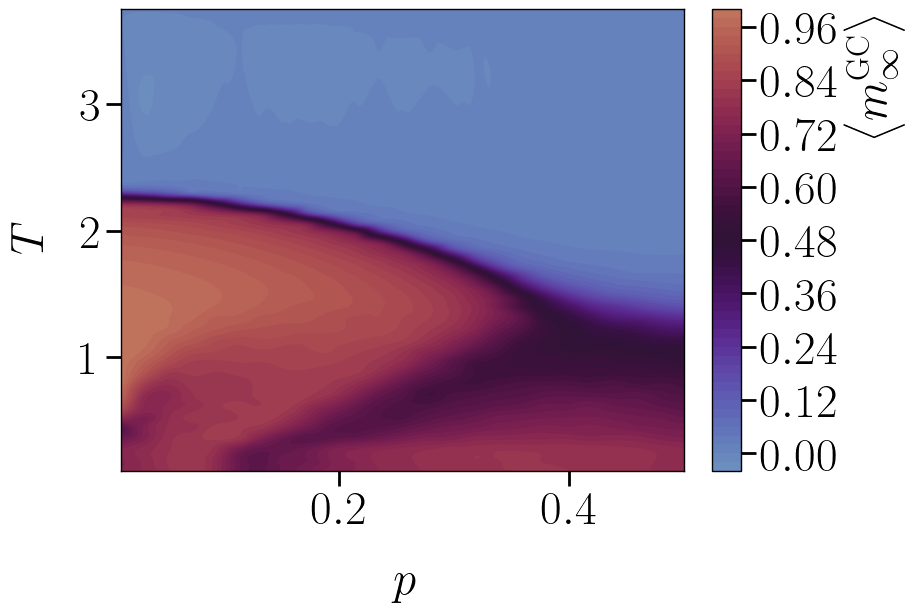

In [8]:

fig, ax = plt.subplots(figsize=(8, 6))
cnt = ax.contourf(x, y, z_smoothed, levels=50, cmap=restr_twilight)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
cb = fig.colorbar(cnt, cax=cax)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
cb.set_label(r'$\expval{m_{\infty}^{\mathrm{GC}}}$', loc='top')


for c in cnt.collections:
    c.set_edgecolor("face")


fig.savefig(path_plot / Path(f'PhDiaL2D_{side}_{cell}.pdf'), 
                bbox_inches='tight', transparent=True)


In [23]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z_smoothed, cmap=restr_twilight, 
#                 edgecolor='k', lw=0.2)

# ax.set_xlabel(r'$p$', labelpad=20)
# ax.set_ylabel(r'$T$', labelpad=20)
# # ax.set_title(r'$\avg*{m_{\infty}^{\mathrm{GC}}}$')
# ax.set_zticks([0, 0.5, 1])
# ax.view_init(elev=15, azim=45)
# ax.set_box_aspect([1,1,1])
# ax.zaxis.set_tick_params(pad=15)
# ax.set_zlim(0, 1)
# ax.view_init(elev=90, azim=-75)
# # ax.text(1, 0, 1.4, r'\textbf{(d)}', fontsize=40, 
# #                 fontweight='bold', color='black')
# # fig.savefig(os.path.join(path_panel4, 'panel_4d_2.pdf'), 
# #             bbox_inches='tight', transparent=True)

### Erdos--Renyi Phase Diagram

In [39]:
size = 4096
kavg = 10
neigen = 2
cell = 'randXERR'
tt = 20

In [40]:
er = ErdosRenyi(size, kavg/size, path_data=path_plot)
fnames = os.listdir(er.isingpath)
p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
            for p in p_values}

In [41]:
averages = []
for p in p_values:
    for T in p_T_dict[p]:
        filename = f"outcl0_p={p}_T={T}_gs{neigen}{cell}{tt}.txt"
        filepath = os.path.join(er.isingpath, filename)
        if os.path.exists(filepath):
            data = np.loadtxt(filepath)
            data = data[np.all(np.abs(data) <= 1, axis=1)]
            avg_abs_col1 = np.mean(np.abs(data[:, 0]))
            averages.append((float(p), float(T), avg_abs_col1))
averages = np.array(averages)

In [42]:
p_values_plot = averages[:, 0]
T_values_plot = averages[:, 1]
avg_abs_col1_plot = averages[:, 2]
x, y, z = interpolate_grid_data(p_values_plot, T_values_plot, avg_abs_col1_plot)
z_smoothed = gaussian_filter(z, sigma=3)  # Adjust sigma for more/less smoothing

/tmp/ipykernel_1732301/1334209802.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


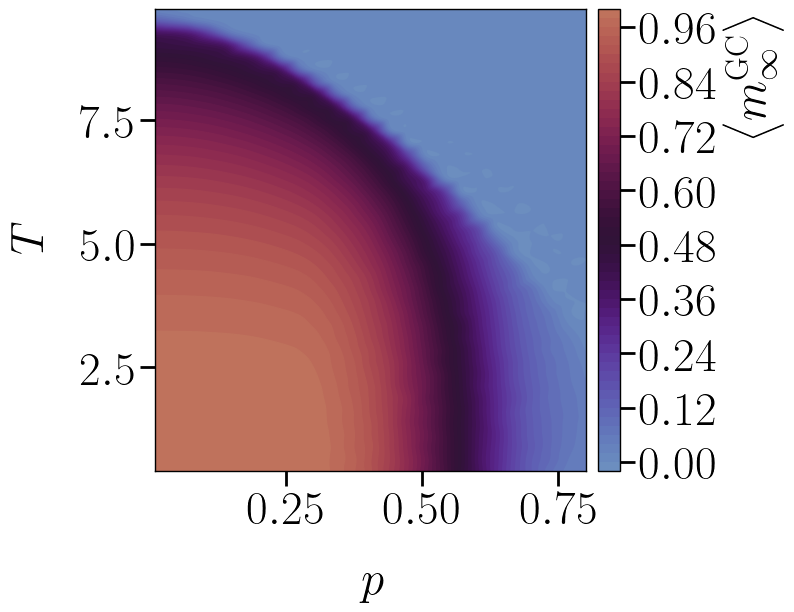

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
cnt = ax.contourf(x, y, z_smoothed, levels=50, cmap=restr_twilight)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', pad='3%')
cb = fig.colorbar(cnt, cax=cax)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
cb.set_label(r'$\expval{m_{\infty}^{\mathrm{GC}}}$', loc='top')


for c in cnt.collections:
    c.set_edgecolor("face")

fig.savefig(path_plot / Path(f'PhDiaER_{side}_{cell}.pdf'), 
                bbox_inches='tight', transparent=True)

(0.0, 1.0)

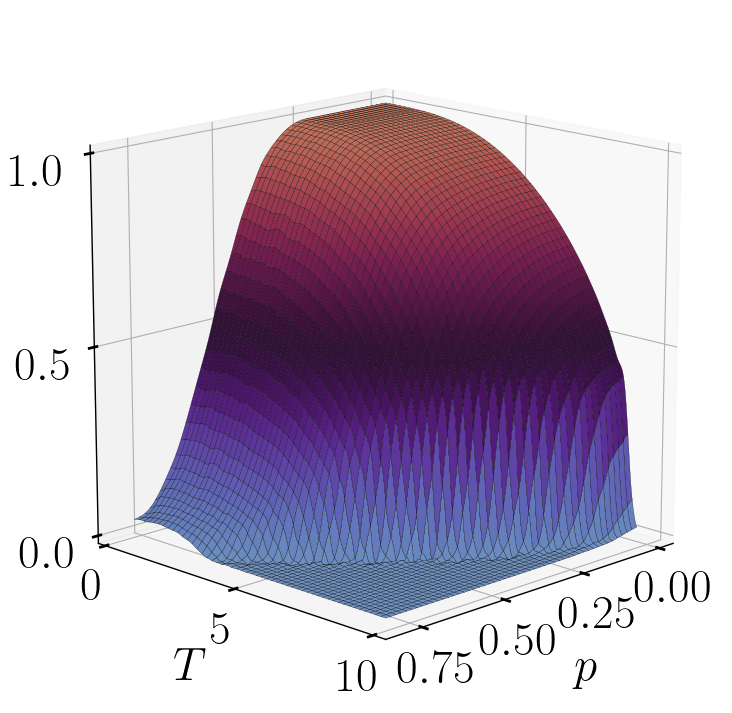

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z_smoothed, cmap=restr_twilight, 
                edgecolor='k', lw=0.2)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
# ax.set_title(r'$\avg*{m_{\infty}^{\mathrm{GC}}}$')
ax.set_zticks([0, 0.5, 1])
ax.view_init(elev=15, azim=45)
ax.set_box_aspect([1,1,1])
ax.zaxis.set_tick_params(pad=15)
ax.set_zlim(0, 1)
# ax.text(1, 0, 1.4, r'\textbf{(d)}', fontsize=40, 
#                 fontweight='bold', color='black')
# fig.savefig(os.path.join(path_panel4, 'panel_4d_2.pdf'), 
#             bbox_inches='tight', transparent=True)